### Actividad: Tipos de Datos y Adquisición de

### Datos en Python

### Parte 2: Adquisición y Almacenamiento de Datos
- Objetivos:
    - Aprender cómo obtener datos de fuentes externas (APIs, web scraping).
    - Aprender a almacenar los datos adquiridos en archivos adecuados.

### Instrucciones Paso a Paso

### 1. Investigación Teórica (1 hora)

- Objetivo: Entender cómo funcionan las APIs, el web scraping y la conexión con bases de datos.

    - 1. Lee sobre las siguientes técnicas de adquisición de datos:
        - APIs: Son interfaces que permiten interactuar con servicios externos para obtener datos. Por ejemplo, puedes obtener datos de Twitter, OpenWeather o cualquier otra fuente pública.
        - Web Scraping: Consiste en extraer datos de sitios web automáticamente. Se usan herramientas como BeautifulSoup o Scrapy.
        - Bases de Datos: Son sistemas de almacenamiento de datos organizados. Puedes acceder a ellas desde Python usando bibliotecas como sqlite3 o SQLAlchemy.
    - 2. Responde las siguientes preguntas en tu informe:
        - ¿Qué es una API y cómo puedes interactuar con ellas para obtener datos?
    - ¿Cuál es la diferencia entre el web scraping y el uso de APIs?
    - ¿Cómo puedes almacenar los datos adquiridos de una API o scraping en un archivo CSV?
    
### 2. Actividad Práctica

- Objetivo: Obtener datos de una API pública y almacenarlos en un archivo CSV.


### 1. Trabajo con una API (Ejemplo con OpenWeather):

- Paso 1: Regístrate en OpenWeatherMap y obtén una clave API.
- Paso 2: Usa la biblioteca requests en Python para obtener datos
del clima. El siguiente código te ayudará a hacer una solicitud a
la API:


In [43]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
api_key = '0ce292f0aab9c9340055125db900e1bb'
ciudad = 'La Laguna'
url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad}&appid={api_key}'
response = requests.get(url)
data = response.json()
# Muestra los datos obtenidos
print(data)

{'coord': {'lon': -16.3201, 'lat': 28.4853}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 290.03, 'feels_like': 289.81, 'temp_min': 289.09, 'temp_max': 290.66, 'pressure': 1025, 'humidity': 78, 'sea_level': 1025, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 4.47, 'deg': 11, 'gust': 6.26}, 'clouds': {'all': 40}, 'dt': 1740141071, 'sys': {'type': 2, 'id': 2017385, 'country': 'ES', 'sunrise': 1740123494, 'sunset': 1740164393}, 'timezone': 0, 'id': 2511401, 'name': 'San Cristóbal de La Laguna', 'cod': 200}


- Paso 3: Almacena los datos en un archivo CSV. Por ejemplo:

In [42]:
# Supón que 'data' tiene la información del clima
df = pd.DataFrame([data])
df.to_csv('weather_data.csv', index=False)
print("Data has been saved to weather_data.csv")

Data has been saved to weather_data.csv



📍 Ubicación: San Cristóbal de La Laguna, ES
🌍 Coordenadas: Latitud 28.4853, Longitud -16.3201
🌤 Clima: Clouds (scattered clouds)
🌡 Temperatura: 290.03 K (≈ 16.88 °C)
🤔 Sensación térmica: 289.81 K (≈
16.66 °C)
🔽 Mínima: 289.09 K (≈ 15.94 °C)
🔼 Máxima: 290.66 K (≈ 17.51 °C)
💨 Viento: 4.47 m/s, Dirección: 11°
💧 Humedad: 78%
📏 Presión: 1025 hPa
☁️ Nubosidad: 40%
👁 Visibilidad: 10000 m

Datos guardados en clima_La Laguna.csv


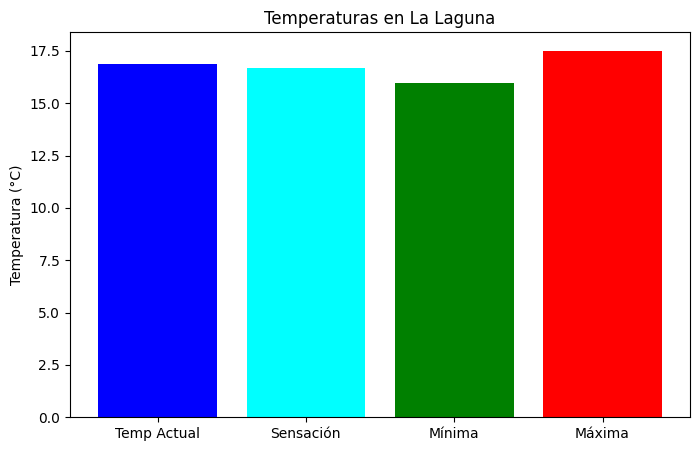

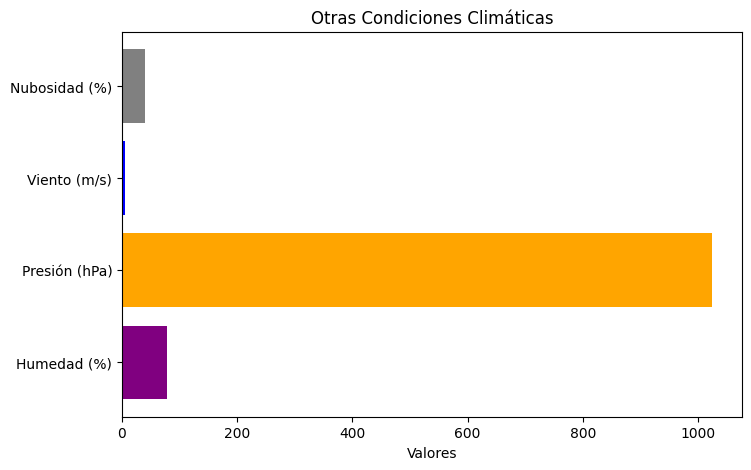

In [45]:
### 1️⃣Formatear los datos y mostrarlos en consola
print(f"""
📍 Ubicación: {data['name']}, {data['sys']['country']}
🌍 Coordenadas: Latitud {data['coord']['lat']}, Longitud {data['coord']['lon']}
🌤 Clima: {data['weather'][0]['main']} ({data['weather'][0]['description']})
🌡 Temperatura: {data['main']['temp']} K (≈ {round(data['main']['temp'] - 273.15,
2)} °C)
🤔 Sensación térmica: {data['main']['feels_like']} K (≈
{round(data['main']['feels_like'] - 273.15, 2)} °C)
🔽 Mínima: {data['main']['temp_min']} K (≈ {round(data['main']['temp_min'] -
273.15, 2)} °C)
🔼 Máxima: {data['main']['temp_max']} K (≈ {round(data['main']['temp_max'] -
273.15, 2)} °C)
💨 Viento: {data['wind']['speed']} m/s, Dirección: {data['wind']['deg']}°
💧 Humedad: {data['main']['humidity']}%
📏 Presión: {data['main']['pressure']} hPa
☁️ Nubosidad: {data['clouds']['all']}%
👁 Visibilidad: {data['visibility']} m
""")
### 2️⃣Guardar los datos en un archivo CSV con Pandas
df = pd.DataFrame([{
"Ubicación": data["name"],
"País": data["sys"]["country"],
"Latitud": data["coord"]["lat"],
"Longitud": data["coord"]["lon"],
"Clima": data["weather"][0]["description"],
"Temperatura (K)": data["main"]["temp"],
"Temperatura (°C)": round(data["main"]["temp"] - 273.15, 2),
"Sensación térmica (°C)": round(data["main"]["feels_like"] - 273.15, 2),
"Temp Mín (°C)": round(data["main"]["temp_min"] - 273.15, 2),
"Temp Máx (°C)": round(data["main"]["temp_max"] - 273.15, 2),
"Humedad (%)": data["main"]["humidity"],
"Presión (hPa)": data["main"]["pressure"],
"Viento (m/s)": data["wind"]["speed"],
"Dirección Viento (°)": data["wind"]["deg"],
"Nubosidad (%)": data["clouds"]["all"],
"Visibilidad (m)": data["visibility"]
}])
df.to_csv("clima_{ciudad}.csv", index=False)
print(f"Datos guardados en clima_{ciudad}.csv")
### 3️⃣Crear gráficos para visualizar los datos
# 📊 Gráfico de temperaturas
plt.figure(figsize=(8, 5))
temps = ["Temp Actual", "Sensación", "Mínima", "Máxima"]
values = [
round(data["main"]["temp"] - 273.15, 2),
round(data["main"]["feels_like"] - 273.15, 2),
round(data["main"]["temp_min"] - 273.15, 2),
round(data["main"]["temp_max"] - 273.15, 2),
]
plt.bar(temps, values, color=["blue", "cyan", "green", "red"])
plt.ylabel("Temperatura (°C)")
plt.title("Temperaturas en La Laguna")
plt.show()
# 📊 Gráfico de otras variables (Humedad, Presión, Viento)
plt.figure(figsize=(8, 5))
labels = ["Humedad (%)", "Presión (hPa)", "Viento (m/s)", "Nubosidad (%)"]
values = [data["main"]["humidity"], data["main"]["pressure"],
data["wind"]["speed"], data["clouds"]["all"]]
plt.barh(labels, values, color=["purple", "orange", "blue", "gray"])
plt.xlabel("Valores")
plt.title("Otras Condiciones Climáticas")
plt.show()

### 2. Trabajo con Web Scraping (Ejemplo con BeautifulSoup):
- Paso 1: Instala BeautifulSoup:

In [23]:
%pip install beautifulsoup4 requests

Note: you may need to restart the kernel to use updated packages.


- Paso 2: Realiza scraping de un sitio web (por ejemplo, extraer los títulos de noticias de un sitio):


In [31]:
from bs4 import BeautifulSoup # Importamos BeautifulSoup para analizar el contenido  HTML
import requests # Importamos la librería requests para hacer peticiones HTTP
# Definimos la URL del sitio web que queremos scrape
url = 'https://www.bbc.com'
# Realizamos la solicitud HTTP al sitio web y obtenemos la respuesta
response = requests.get(url)
# Usamos BeautifulSoup para analizar el contenido de la respuesta en formato HTML
soup = BeautifulSoup(response.content, 'html.parser')
# Buscamos todas las etiquetas <h2> en el contenido HTML, que deberían contener los titulares
headlines = soup.find_all('h2')
# Almacenamos los titulares en una lista
news= []
# Recorremos cada uno de los elementos encontrados
for headline in headlines:
    text = headline.text.strip()
if text: # Solo añadimos si no está vacío
    news.append(text)
# Imprimimos todos los titulares juntos, cada uno en una línea
print("\n".join(news))


Follow BBC on:


- Paso 3: Almacena los datos obtenidos en un archivo CSV:

In [32]:
headlines_text = [headline.text for headline in headlines]
df = pd.DataFrame(headlines_text, columns=['Headline'])
df.to_csv('bbc_headlines.csv', index=False)


### 3. Entregable:
- Un informe que incluya:
    - Respuestas a las preguntas teóricas.
    - El código utilizado para obtener y almacenar los datos (de la API o mediante scraping)
    - Los archivos CSV con los datos obtenidos